**DATASET**

The both training and evaluation operations would be handled with [Fec2013](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) dataset + faces from the wild (scraped from google images).

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
path='drive/My Drive/Facial-Expression-Detection-V2'
print(os.listdir(path))

['3.jpg', 'face_crop.py', '2.jpg', '.gitignore', 'LICENSE', '1.jpg', 'haarcascade_frontalface_alt.xml', 'README.md', '.ipynb_checkpoints', 'data', 'fer2013', '.git', 'FED.ipynb', 'photo.jpg', 'FED_transfer.ipynb', 'capture.jpg', 'FED_FIW_local_test.ipynb']


In [3]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
#------------------------------
#cpu - gpu configuration
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 8 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
#sess = tf.Session(config=config) 
#keras.backend.set_session(config)
#------------------------------
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 100
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

with open(path+"/fer2013/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------

number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples


In [5]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'] )

#------------------------------

fit = False

if fit == False:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, learning_rate=0.0001) #train for randomly selected one
else:
    model.load_weights(path+'/data/model100.h5') #load weights
 
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------



Epoch 1/100
256/256 [==============================] - 15s 57ms/step - loss: 1.7849 - accuracy: 0.2621
Epoch 2/100
256/256 [==============================] - 7s 28ms/step - loss: 1.5483 - accuracy: 0.3863
Epoch 3/100
256/256 [==============================] - 7s 28ms/step - loss: 1.3802 - accuracy: 0.4665
Epoch 4/100
256/256 [==============================] - 7s 28ms/step - loss: 1.2760 - accuracy: 0.5112
Epoch 5/100
256/256 [==============================] - 7s 28ms/step - loss: 1.1907 - accuracy: 0.5460
Epoch 6/100
256/256 [==============================] - 7s 28ms/step - loss: 1.1233 - accuracy: 0.5725
Epoch 7/100
256/256 [==============================] - 7s 28ms/step - loss: 1.0706 - accuracy: 0.5948
Epoch 8/100
256/256 [==============================] - 7s 28ms/step - loss: 1.0187 - accuracy: 0.6160
Epoch 9/100
256/256 [==============================] - 7s 28ms/step - loss: 0.9713 - accuracy: 0.6334
Epoch 10/100
256/256 [==============================] - 7s 28ms/step - loss: 0.92

### **save and analyze Model**

In [6]:
#Saving the model
model.save(path+'/data/model100.h5')

In [7]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.03628658760891022
Train accuracy: 98.69030714035034
Test loss: 4.783131996414129
Test accuracy: 56.64530396461487


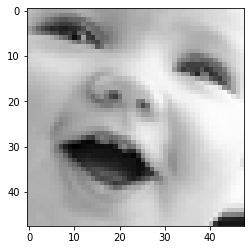

[1.4755918e-01 9.0596100e-09 3.8852843e-03 2.8432316e-01 5.5822212e-01
 5.9990003e-03 1.1271131e-05]


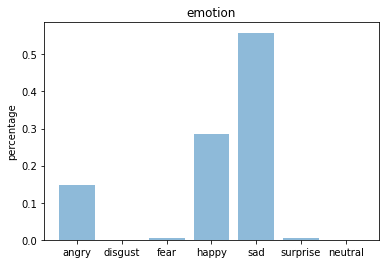

----------------------------------------------


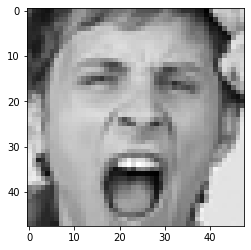

[1.0000000e+00 3.7514611e-19 5.9360505e-15 8.4227971e-25 1.0924708e-26
 3.3568184e-17 1.5319323e-28]


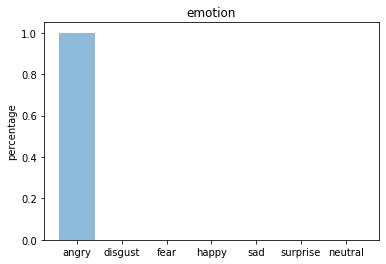

----------------------------------------------


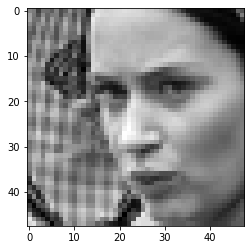

[4.9670061e-06 1.4236745e-09 1.7808761e-02 5.0630763e-07 9.8216045e-01
 1.2428564e-05 1.2830245e-05]


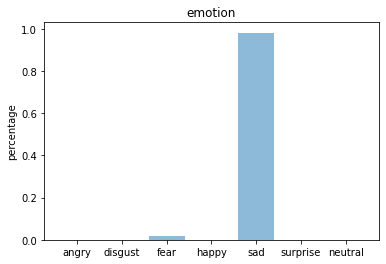

----------------------------------------------


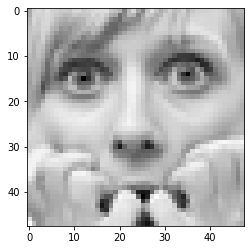

[8.7185017e-15 9.4549316e-15 3.0226618e-05 1.6553000e-16 8.0982362e-19
 9.9996972e-01 6.5196947e-17]


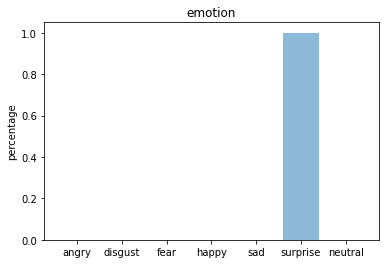

----------------------------------------------


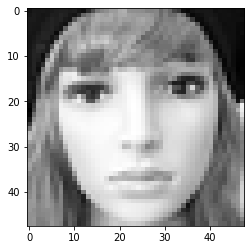

[2.0662719e-07 2.4360976e-19 3.4904580e-13 6.9061734e-09 2.8027557e-07
 6.3953426e-10 9.9999952e-01]


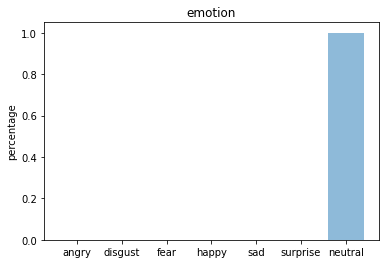

----------------------------------------------


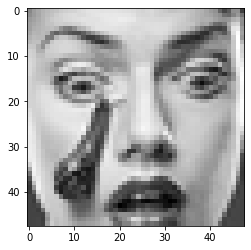

[6.3383877e-01 2.9164043e-11 6.8983613e-03 6.1940412e-08 3.2960877e-15
 3.5926282e-01 2.7867750e-09]


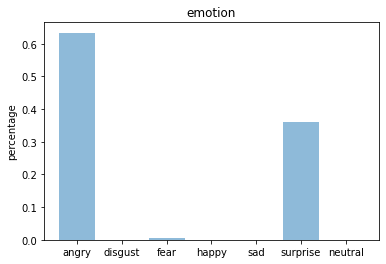

----------------------------------------------


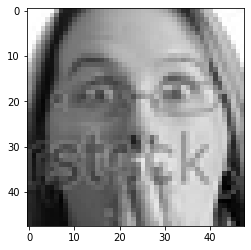

[1.4221679e-18 1.5077314e-15 4.2271727e-06 5.7070684e-17 1.1008215e-24
 9.9999583e-01 8.6694809e-22]


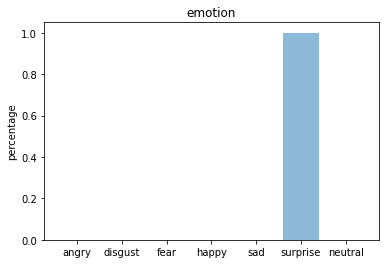

----------------------------------------------


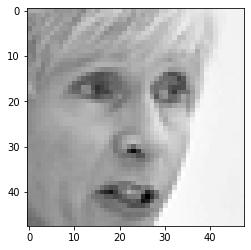

[3.2033985e-12 1.6790064e-17 9.9931693e-01 4.9389688e-14 3.7893768e-09
 6.8294030e-04 8.3707356e-08]


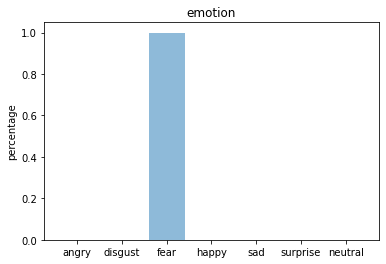

----------------------------------------------


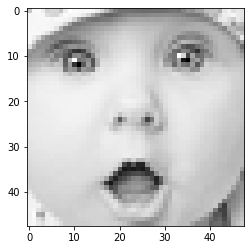

[2.4047121e-22 1.1204804e-31 1.7404360e-20 0.0000000e+00 6.0049734e-21
 1.0000000e+00 3.4850238e-21]


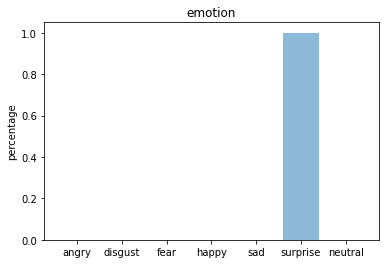

----------------------------------------------


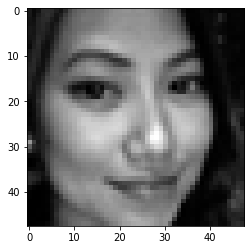

[2.5693687e-08 1.5499493e-12 3.6624185e-12 9.6263361e-01 3.7366383e-02
 6.2715266e-10 5.0852150e-10]


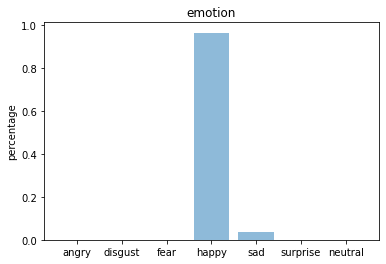

----------------------------------------------


In [8]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 20 and index >= 10:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [9]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions: 
  pred_list.append(np.argmax(i))
 
for i in y_test: 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[270,   8,  45,  29,  49,  14,  52],
       [ 23,  25,   2,   1,   1,   0,   4],
       [ 83,   3, 189,  20,  79,  48,  74],
       [ 60,   1,  19, 686,  36,  32,  61],
       [141,   7,  67,  49, 255,  27, 107],
       [ 18,   0,  35,  17,  16, 309,  20],
       [ 96,   1,  41,  55,  98,  17, 299]])

In [10]:
from keras.models import load_model
model = load_model(path+'/data/model100.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [11]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


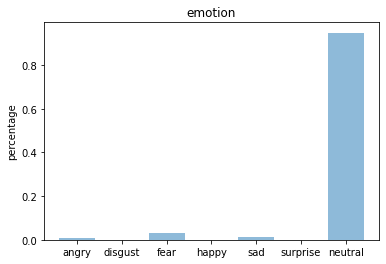

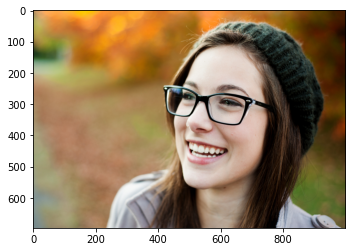

In [12]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

def plotface(file):
  #file = path+'/1.jpg'
  true_image = image.load_img(file)
  img = image.load_img(file, grayscale=True, target_size=(48, 48))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  custom = model.predict(x)
  emotion_analysis(custom[0])

  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);

  plt.gray()
  plt.imshow(true_image)
  plt.show()

plotface(path+'/1.jpg')

In [13]:
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


In [14]:
#pip install -U imgaug==0.2.7


In [15]:
import cv2

def facecrop(image):  
    """
    Use pretrained HAAR cascade to detect the face and build a bounding box 
    """
    facedata = '/content/drive/My Drive/Facial-Expression-Detection-V2/haarcascade_frontalface_alt.xml'
    #facedata = path+"/haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite(path+'/capture.jpg', sub_face)
            print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)
    #plt.imshow(img)


if __name__ == '__main__':
    facecrop(path+'/1.jpg')


Writing: drive/My Drive/Facial-Expression-Detection-V2/1.jpg


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


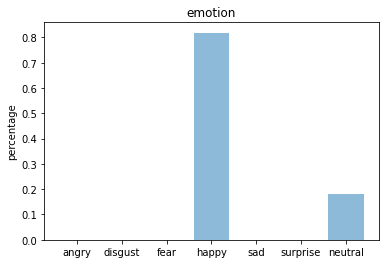

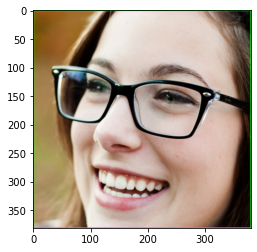

In [16]:
plotface(path+'/capture.jpg')

In [17]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=path+'/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [18]:
take_photo()

<IPython.core.display.Javascript object>

'drive/My Drive/Facial-Expression-Detection-V2/photo.jpg'

Writing: drive/My Drive/Facial-Expression-Detection-V2/photo.jpg


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


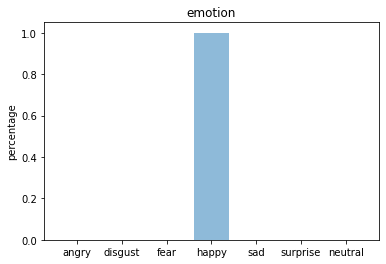

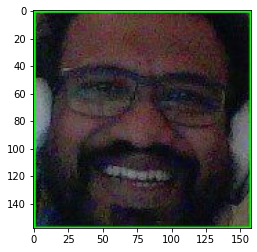

In [19]:
#Test the captured image
facecrop(path+'/photo.jpg')
plotface(path+'/capture.jpg')